#### Задание 1

Имеются данные adult.csv Target  income (уровень дохода)
Описание признаков можно найти по ссылке http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

1. Построить модель логистической регрессии, которая предсказывает уровень дохода человека

2. Построить модели SVM, которая предсказывает уровень дохода человека.

3. Вывести качество полученных моделей на тестовой выборке (score).

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv( 'adult.csv' )
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
list(data)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [22]:
for i in list(data):
    if len( data[ pd.isnull( data[i] ) ] ) != 0:
        print(i, 'null', len( data[ pd.isnull( data[i] ) ] ))
    
    if len( data[data[i] == '?']) != 0:
        print(i, '?', len( data[data[i] == '?']) )

workclass ? 2799
occupation ? 2809
native-country ? 857


In [55]:
data[data['workclass'] == '?'].head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K


In [85]:
# удаляем записи с вопросами
data_ = data.drop(np.where(data['occupation'] == '?') [0]).copy()
data_1 = data_.loc[~data_['native-country'].isin(['?'])].copy()
data_1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [86]:
for i in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']:
    
    le.fit( data_1[i] )
    data_1[i[:3]] = le.transform( data_1[i] )

data_1    
    

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,income,wor,edu,mar,occ,rel,rac,gen,nat,inc
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,<=50K,2,1,4,6,3,2,1,38,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,<=50K,2,11,2,4,0,4,1,38,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,>50K,1,7,2,10,0,4,1,38,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,>50K,2,15,2,6,0,2,1,38,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,...,<=50K,2,0,4,7,1,4,1,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,<=50K,2,7,2,12,5,4,0,38,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,>50K,2,11,2,6,0,4,1,38,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,<=50K,2,11,6,0,4,4,0,38,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,<=50K,2,11,4,0,3,4,1,38,0


In [9]:
from sklearn.linear_model import LogisticRegression

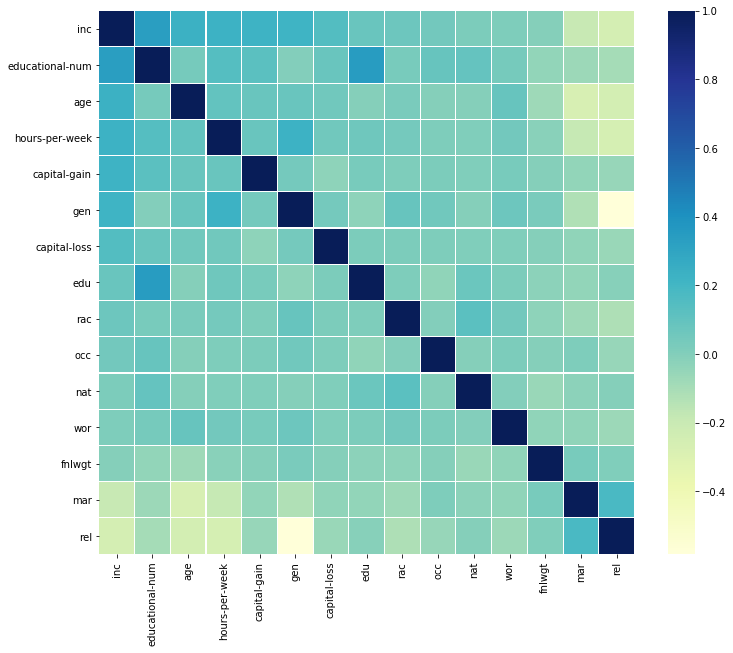

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

k = 15

corrmat = data_1.corr()
cols = corrmat.nlargest(k, 'inc')['inc'].index
cm = np.corrcoef(data_1[cols].values.T)

f, ax = plt.subplots(figsize =(12, 10))
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",
            linewidths = 0.1, yticklabels = cols.values, xticklabels = cols.values)


In [90]:
# выбрем наиболее коррелирующие признаки
selectedColumns = data_1[ [ 'inc', 'educational-num', 'education', 'age', 'hours-per-week', 'capital-gain', 'gen', 'capital-loss', 'rac'] ]

# столбец sport является категориальной переменной
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies( selectedColumns, columns = [ 'education' ] )

# столбец sex является целевой переменной, удаляем его из X
del X['inc']
X.head()

,educational-num,age,hours-per-week,capital-gain,gen,capital-loss,rac,education_10th,education_11th,education_12th,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,7,25,40,0,1,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9,38,50,0,1,0,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,12,28,40,0,1,0,4,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,10,44,40,7688,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,34,30,0,1,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# записываем в переменную y столбец income

y = pd.Series( data = data_1['income'] )
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
5    <=50K
Name: income, dtype: object

In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
# обучаем модель

model.fit( X_train, y_train )
predictions = model.predict_proba( X_test )

In [97]:
# вывести качество полученной модели на тестовой выборке (score)
model.score(X_test, y_test)

0.8202255472838506

In [98]:
# Построить модели SVM, которая предсказывает уровень дохода человека.
from sklearn.svm import SVC


clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [101]:
# вывести качество полученной модели на тестовой выборке (score)
clf.score(X_test, y_test)

0.8268592909265129